imports

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


Read the files

In [181]:
first_df = pd.read_csv('../data/heart_first_dataset.csv')
second_df = pd.read_csv('../data/heart_second_dataset.csv')
print(first_df.columns)
print(second_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


Do one dataset with both

In [182]:
#as we can see the dataset have the same columns, but not name exactly the same way
#we will rename the columns to have the same name and concatenate the two datasets
first_df = first_df.rename(columns={"target":"output"})
second_df = second_df.rename(columns={"trtbps":"trestbps",
                                      "thalachh":"thalach",
                                      "exng":"exang",
                                      "slp":"slope",
                                      "caa":"ca",
                                      "thall":"thal",
                                      "target":"output"})
print(first_df.columns)
print(second_df.columns)
print(first_df.shape)
print(second_df.shape)
new_df = pd.concat([first_df, second_df], ignore_index=True)
print(new_df.shape)
new_df.to_csv('../data/heart_dataset.csv', index=False)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'output'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'output'],
      dtype='object')
(1025, 14)
(303, 14)
(1328, 14)


explore the data

In [183]:
new_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.614458,246.060241,0.149096,0.529367,149.235693,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.514997,51.627522,0.356318,0.527220,22.975286,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


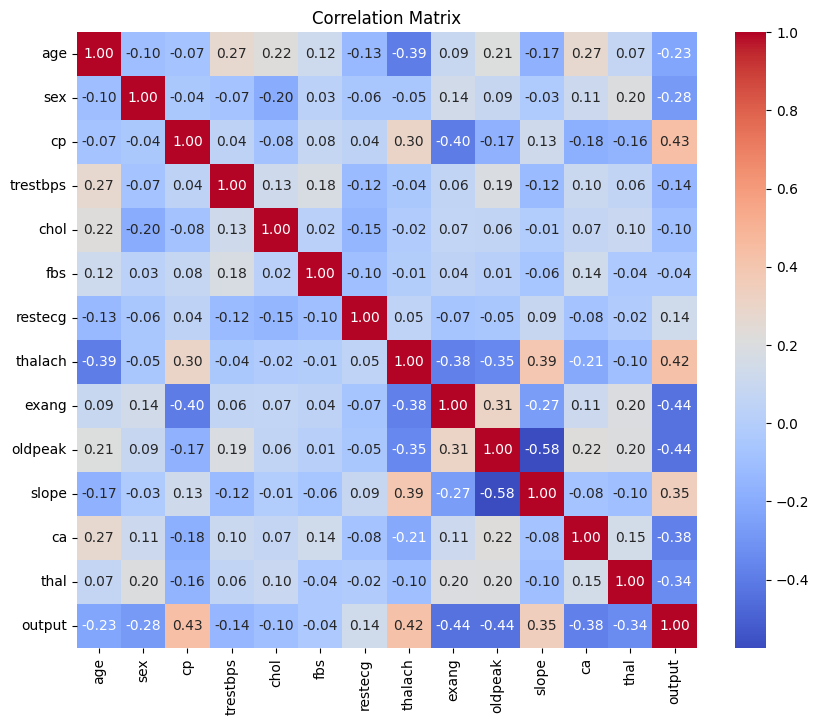

In [184]:
#correlation matrix
corr_matrix = new_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [185]:
#correlation with the output
corr_matrix = corr_matrix.drop('output')
corr_with_output = corr_matrix['output'].sort_values(ascending=False)
print(corr_with_output)


cp          0.434704
thalach     0.422724
slope       0.345709
restecg     0.135011
fbs        -0.038194
chol       -0.096515
trestbps   -0.140117
age        -0.228442
sex        -0.280008
thal       -0.339286
ca         -0.384375
oldpeak    -0.436815
exang      -0.437802
Name: output, dtype: float64


# Machine learning

output: 0 = no disease, 1 = disease

## Training part

split the data

In [186]:
X = new_df.drop('output', axis=1)
y = new_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234567)


We need to know one sample of each type of output in order to label the prediction

In [187]:
#for this we will need an id column
X_train['id'] = X_train.index
id_disease = X_train[y_train == 1]['id']
id_no_disease = X_train[y_train == 0]['id']
print(id_disease) 

733      733
263      263
402      402
330      330
1185    1185
        ... 
770      770
1120    1120
125      125
325      325
403      403
Name: id, Length: 555, dtype: int64


Kmeans

1.0
0.0


c:\Users\mathy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


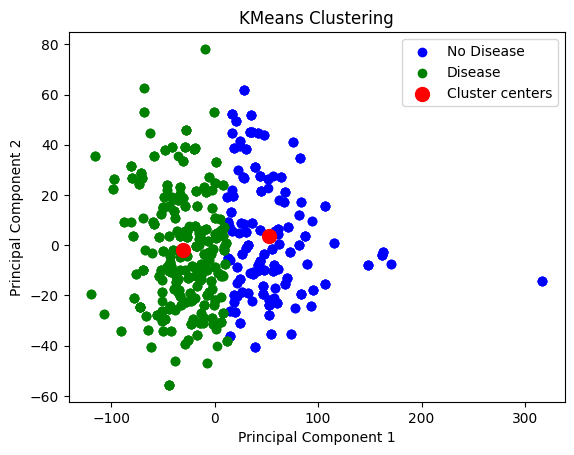

In [188]:
#before doing the clustering we need to do a PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=2)

#in order to be able to label the cluster after
id_column = X_train['id']
X_train = X_train.drop('id', axis=1)


X_train_pca = pca.fit_transform(X_train)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_pca)
y_pred_with_kmeans = kmeans.predict(X_train_pca)

#detect which cluster is the one with the sample_no_disease
X_train_pca = pd.DataFrame(X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
#join the X_train_pca with the id column and the y_pred_with_kmeans
X_train_pca_final_pred_with_kmeans = pd.concat([X_train_pca, id_column, pd.Series(y_pred_with_kmeans, name='cluster')], axis=1)

output_no_disease = X_train_pca_final_pred_with_kmeans[X_train_pca_final_pred_with_kmeans['id'].isin(id_no_disease)]['cluster'].iloc[0]
print(output_no_disease)
output_disease = X_train_pca_final_pred_with_kmeans[X_train_pca_final_pred_with_kmeans['id'].isin(id_disease)]['cluster'].iloc[0]
print(output_disease)

cluster_no_disease = X_train_pca_final_pred_with_kmeans[X_train_pca_final_pred_with_kmeans['cluster'] == output_no_disease]
cluster_disease = X_train_pca_final_pred_with_kmeans[X_train_pca_final_pred_with_kmeans['cluster'] == output_disease]
# Plotting the clusters
plt.scatter(cluster_no_disease['Principal Component 1'], cluster_no_disease['Principal Component 2'], 
            label='No Disease', c='blue')
plt.scatter(cluster_disease['Principal Component 1'], cluster_disease['Principal Component 2'], 
            label='Disease', c='green')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1, label='Cluster centers')

# Adding labels and legend
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


SECOND METHOD

## Results parts

let's compare the efficency using: accuracy,precision, recall and f1-score

## testing on realtime data part